In [1]:
# import necessary libraries and modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale, Normalizer, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
import xgboost as xgb

In [2]:
# read previously created csv files into datframe
df = pd.read_csv('C:\\Users\\phili\\Documents\\Downloads\\BrazilCapstone\\data.csv') 
rfm = pd.read_csv('C:\\Users\\phili\\Documents\\Downloads\\BrazilCapstone\\rfm1.csv')
train = pd.read_csv('C:\\Users\\phili\\Documents\\Downloads\\BrazilCapstone\\training.csv')

In [3]:
#create dataframe for kmeans model
train = rfm[['r', 'f', 'm']]

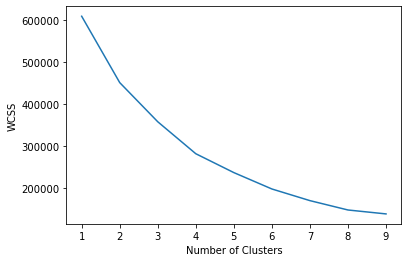

In [4]:
# determine optimal number of clusters
elbow = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(train)
    elbow.append(kmeans.inertia_)
    
plt.plot(range(1,10), elbow)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
# separate the data frame, then split into training and test data
y= train['m']
X= train.drop('m', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
#instantiate kmeans model
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state= 123)

In [7]:
# fit the model
kmeans.fit(X_train, y_train)

KMeans(n_clusters=5, random_state=123)

In [8]:
# determine the cluster ceneters
kmeans.cluster_centers_

array([[2.20820315, 2.59948149],
       [4.50388098, 1.99336999],
       [3.98372724, 4.49106105],
       [1.75217391, 1.24891304],
       [1.49586375, 4.51476075]])

In [9]:
# predict and score the model
pred = kmeans.predict(X_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5058
           1       0.26      0.21      0.23      6228
           2       0.23      0.19      0.20      6043
           3       0.16      0.21      0.18      3921
           4       0.15      0.19      0.17      4068
           5       0.00      0.00      0.00         0

    accuracy                           0.16     25318
   macro avg       0.13      0.13      0.13     25318
weighted avg       0.17      0.16      0.16     25318



C:\Users\phili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\phili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# obatin other scoring metics
kmeans.score(X_test)

-20662.7595764258

In [11]:
# create data frame for regression models
rfm = rfm[['recency', 'frequency', 'monetary', 'r', 'f', 'm', 'rfm_score']]

In [12]:
# separate the data frame, then split into training and test data
y = rfm['monetary'].values
X = rfm.drop('monetary', axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
# scale and transform the data in order to run regression models
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# instantiate, fit and predict the first regressor model
regressor = KNeighborsRegressor(n_neighbors = 5)
regressor.fit(X_train, y_train)
regressor.predict(X_test)

array([ 49.676,  24.718,  75.958, ...,  24.376, 488.794,  53.154])

In [15]:
# score the first model
regressor.score(X_test, y_test)

0.3283227109897249

In [16]:
# instantiate, fit and predict the second model
gbr_model = GradientBoostingRegressor(max_depth=4, loss = 'quantile', learning_rate = 0.1)
gbr_model.fit(X_train, y_train)
gbr_model.predict(X_test)

array([ 61.20670641,  35.78915909, 100.85619827, ...,  36.14621632,
       712.86500037,  61.66838111])

In [17]:
# score the second model
gbr_model.score(X_test, y_test)

-0.010825474141158864